In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 1. Read the dataset

In [3]:
df = pd.read_csv('./data/StudentsPerformance.csv')

#### 2. Show top 5 records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 3. 

#### 3.1 Checking missing values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Insight:
 - There are no missing values in the dataset.

#### 3.2 Checking duplicate values

In [6]:
df.duplicated().sum()

0

##### Insight:
 - There are no duplicate values in the dataset.

#### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking unique values

In [8]:
# Checking unique values of each feature
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Checking statistics of the dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights:
 - From above description of numerical data, all means are very close to each other - between 66 to 69.1
 - All standard deviations are close to 14 to 15.19
 - While there is a manimun score 0 for math, for writing is 10 and for reading is 17.

#### 3.6 Exploring Data

In [12]:
print("Categories in 'gender' feature: ", df['gender'].unique())
print("Categories in 'lunch' feature: ", df['lunch'].unique())
print("Categories in 'race/ethnicity' feature: ", df['race_ethnicity'].unique())
print("Categories in 'test preparation course' feature: ", df['test_preparation_course'].unique())
print("Categories in 'parental level of education' feature: ", df['parental_level_of_education'].unique())

Categories in 'gender' feature:  ['female' 'male']
Categories in 'lunch' feature:  ['standard' 'free/reduced']
Categories in 'race/ethnicity' feature:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'test preparation course' feature:  ['none' 'completed']
Categories in 'parental level of education' feature:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

#### 3.8 Adding new columns "Total Score" and "Average"

In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/len(numerical_features)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print('Number of the students with full marks in Maths: ', math_full)
print('Number of the students with full marks in Writing: ', writing_full)
print('Number of the students with full marks in Reading: ', reading_full)

Number of the students with full marks in Maths:  7
Number of the students with full marks in Writing:  14
Number of the students with full marks in Reading:  17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print('Number of the students with less than 20 marks in Maths: ', reading_less_20)
print('Number of the students with less than 20 marks in Writing: ', writing_less_20)
print('Number of the students with less than 20 marks in Reading: ', math_less_20)

Number of the students with less than 20 marks in Maths:  1
Number of the students with less than 20 marks in Writing:  3
Number of the students with less than 20 marks in Reading:  4


##### Insights:
 - From above values we get students have performed the worst in Maths.
 - Students performed best in Reading.

#### 4. Data Visualization

#### 4.1 Histogram and KDE

<Axes: xlabel='average', ylabel='Count'>

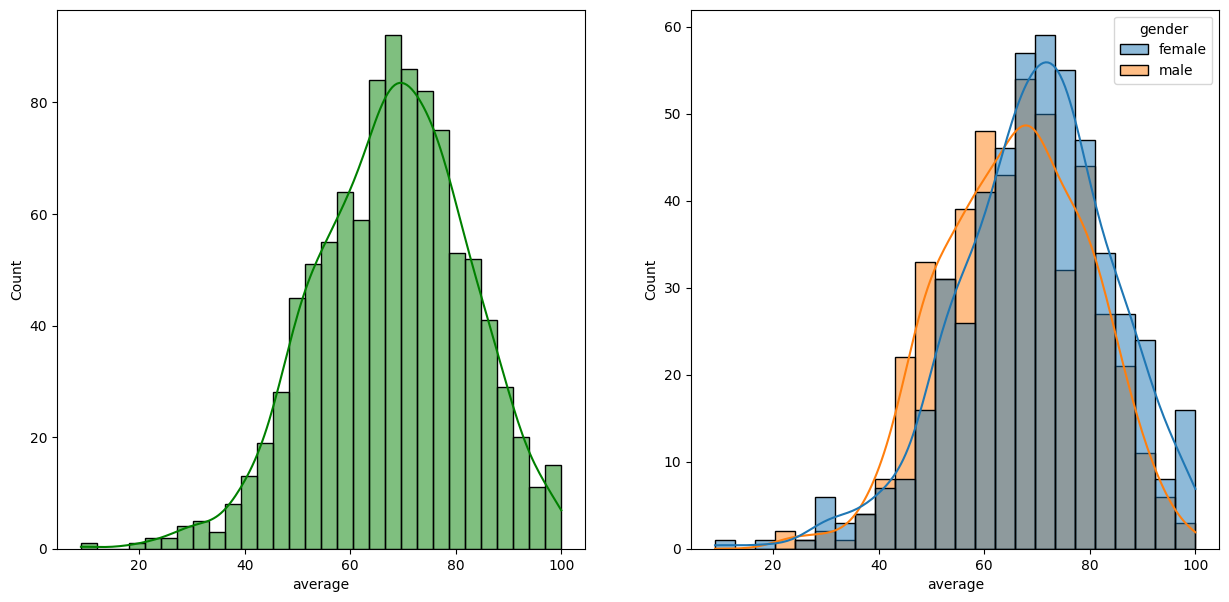

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

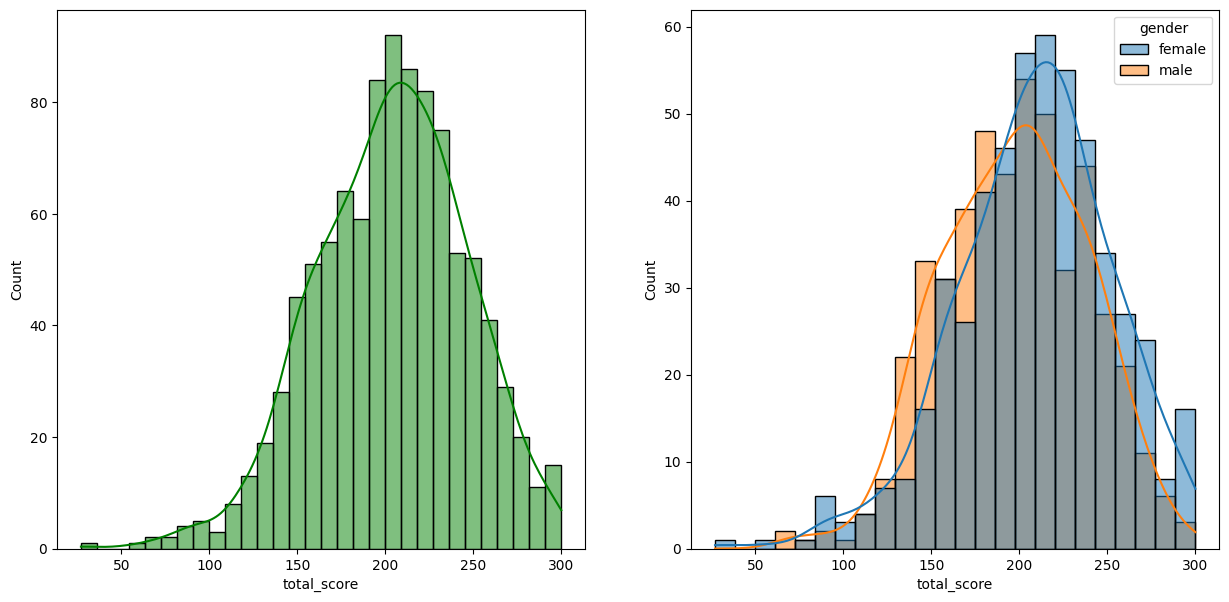

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

##### Insight:
 - Female students tend to perform well than male students.

<Axes: xlabel='average', ylabel='Count'>

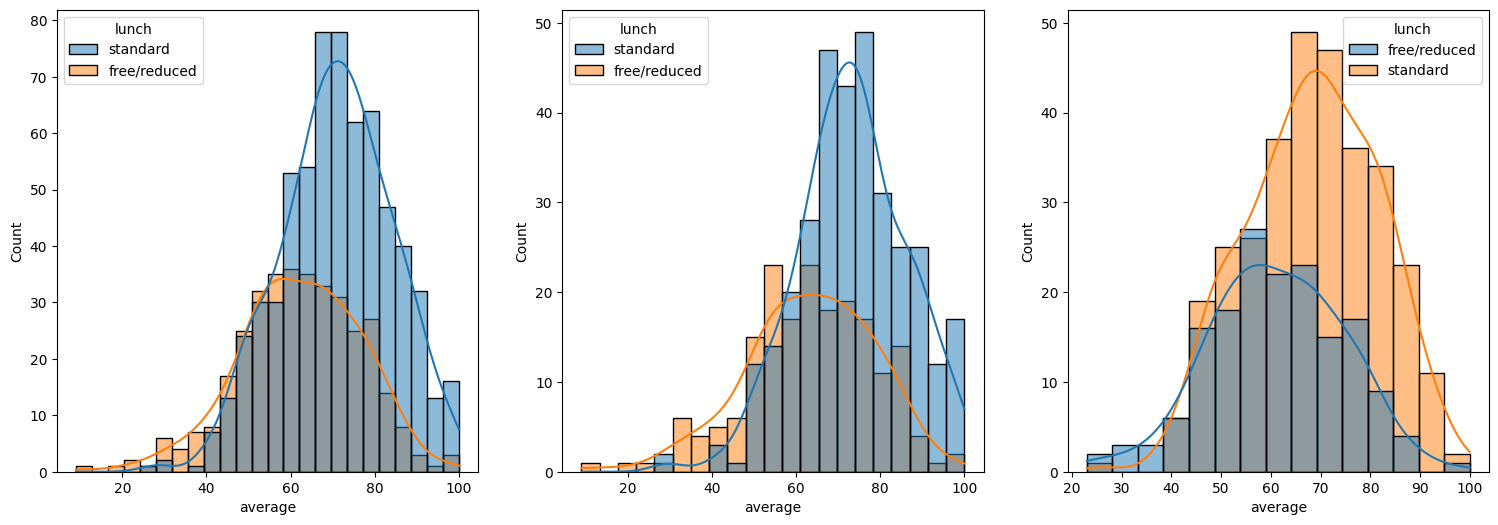

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')

##### Insight:
 - Standard lunch helps perform well in exams.

<Axes: xlabel='average', ylabel='Count'>

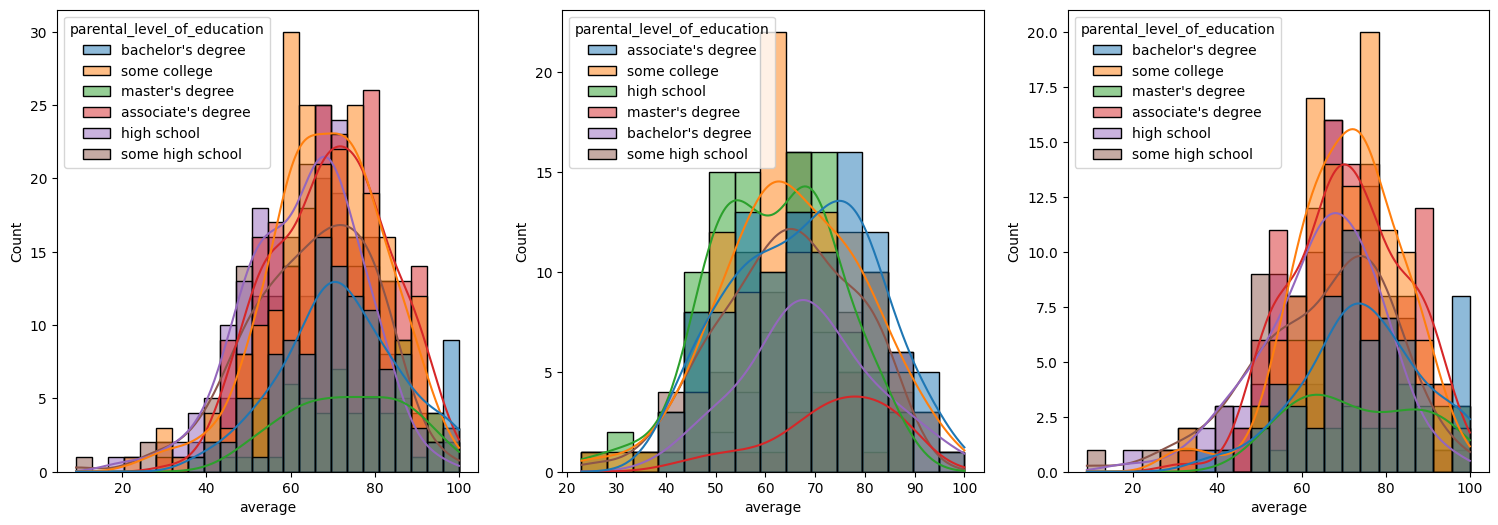

In [23]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education')


<Axes: xlabel='average', ylabel='Count'>

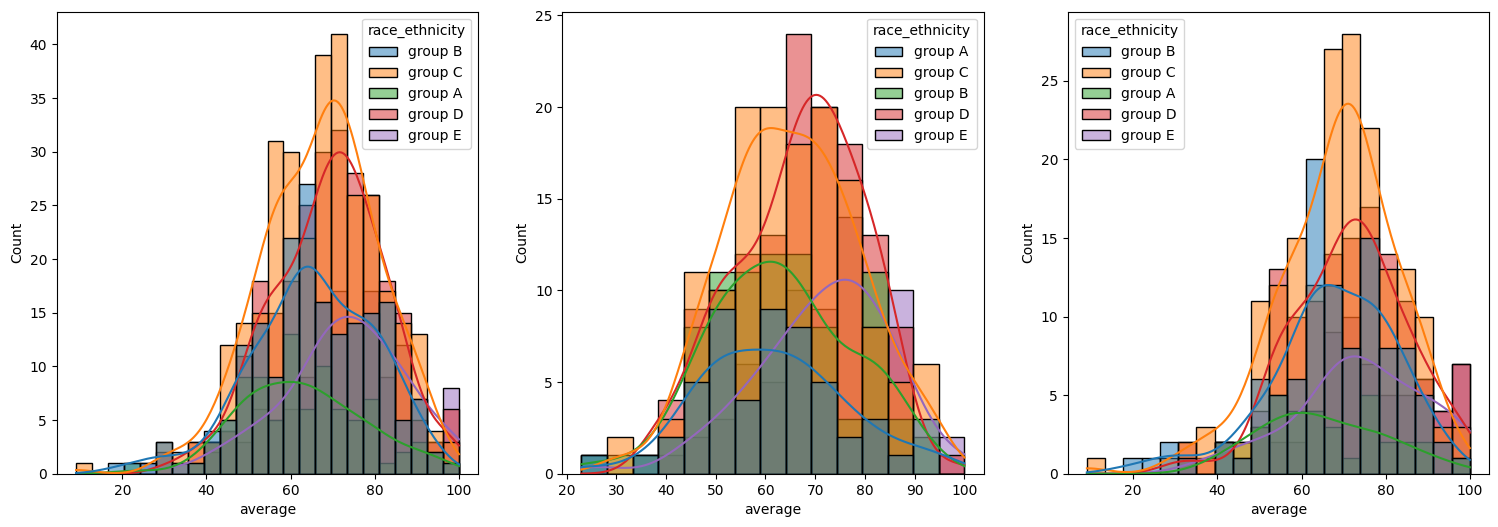

In [24]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity')

##### Insightds:
 - Students of group A and group E tends to perform poorly in exam.

<Axes: xlabel='average', ylabel='Count'>

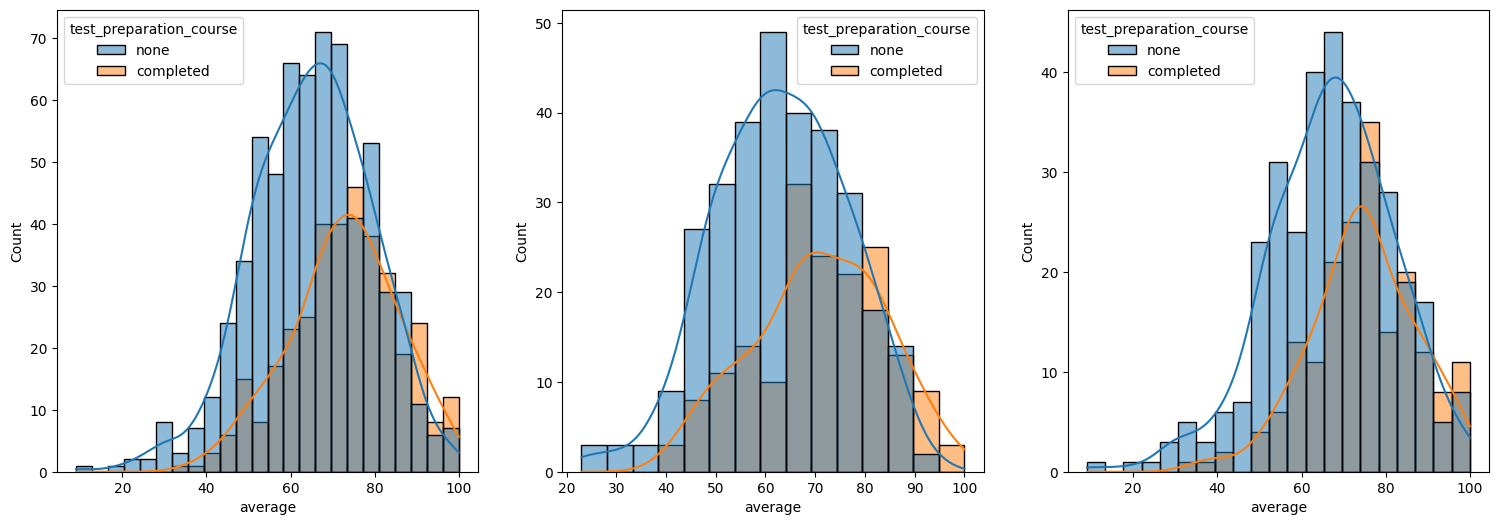

In [26]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='test_preparation_course')

##### Insights:
 - Students with no test preparation perform well in exam.

#### 4.2 Maximum score of students in all subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

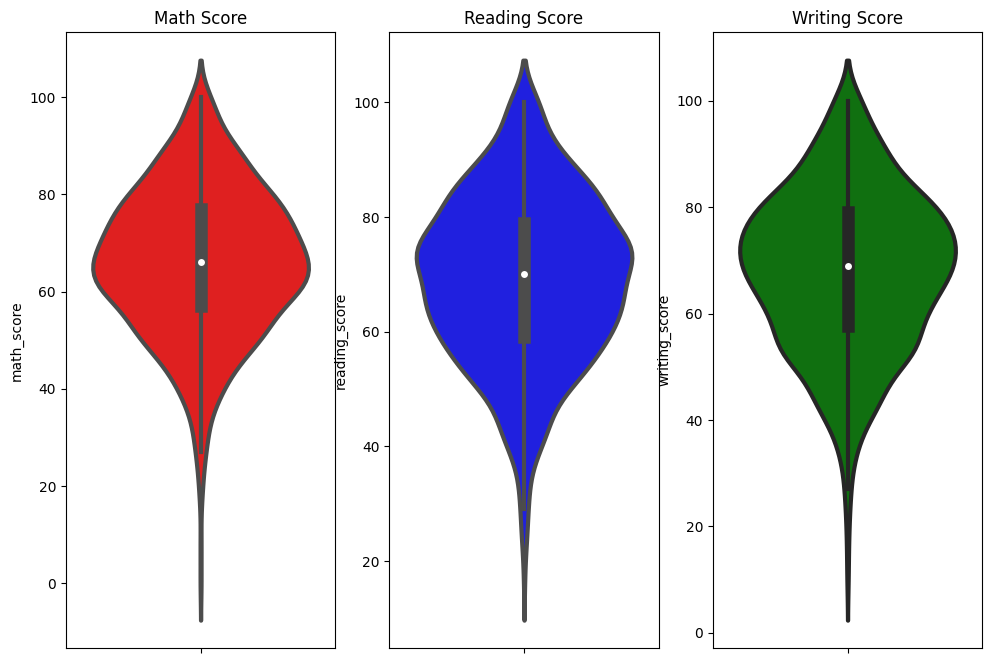

In [27]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(y='reading_score', data=df, color='blue', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(y='writing_score', data=df, color='green', linewidth=3)


##### Insights:
 - From the above plots shows that most of the students score 55-85 in maths whereas scored 50-85 in reading and writing.

#### 4.3 Multivariate analysis using pie plot

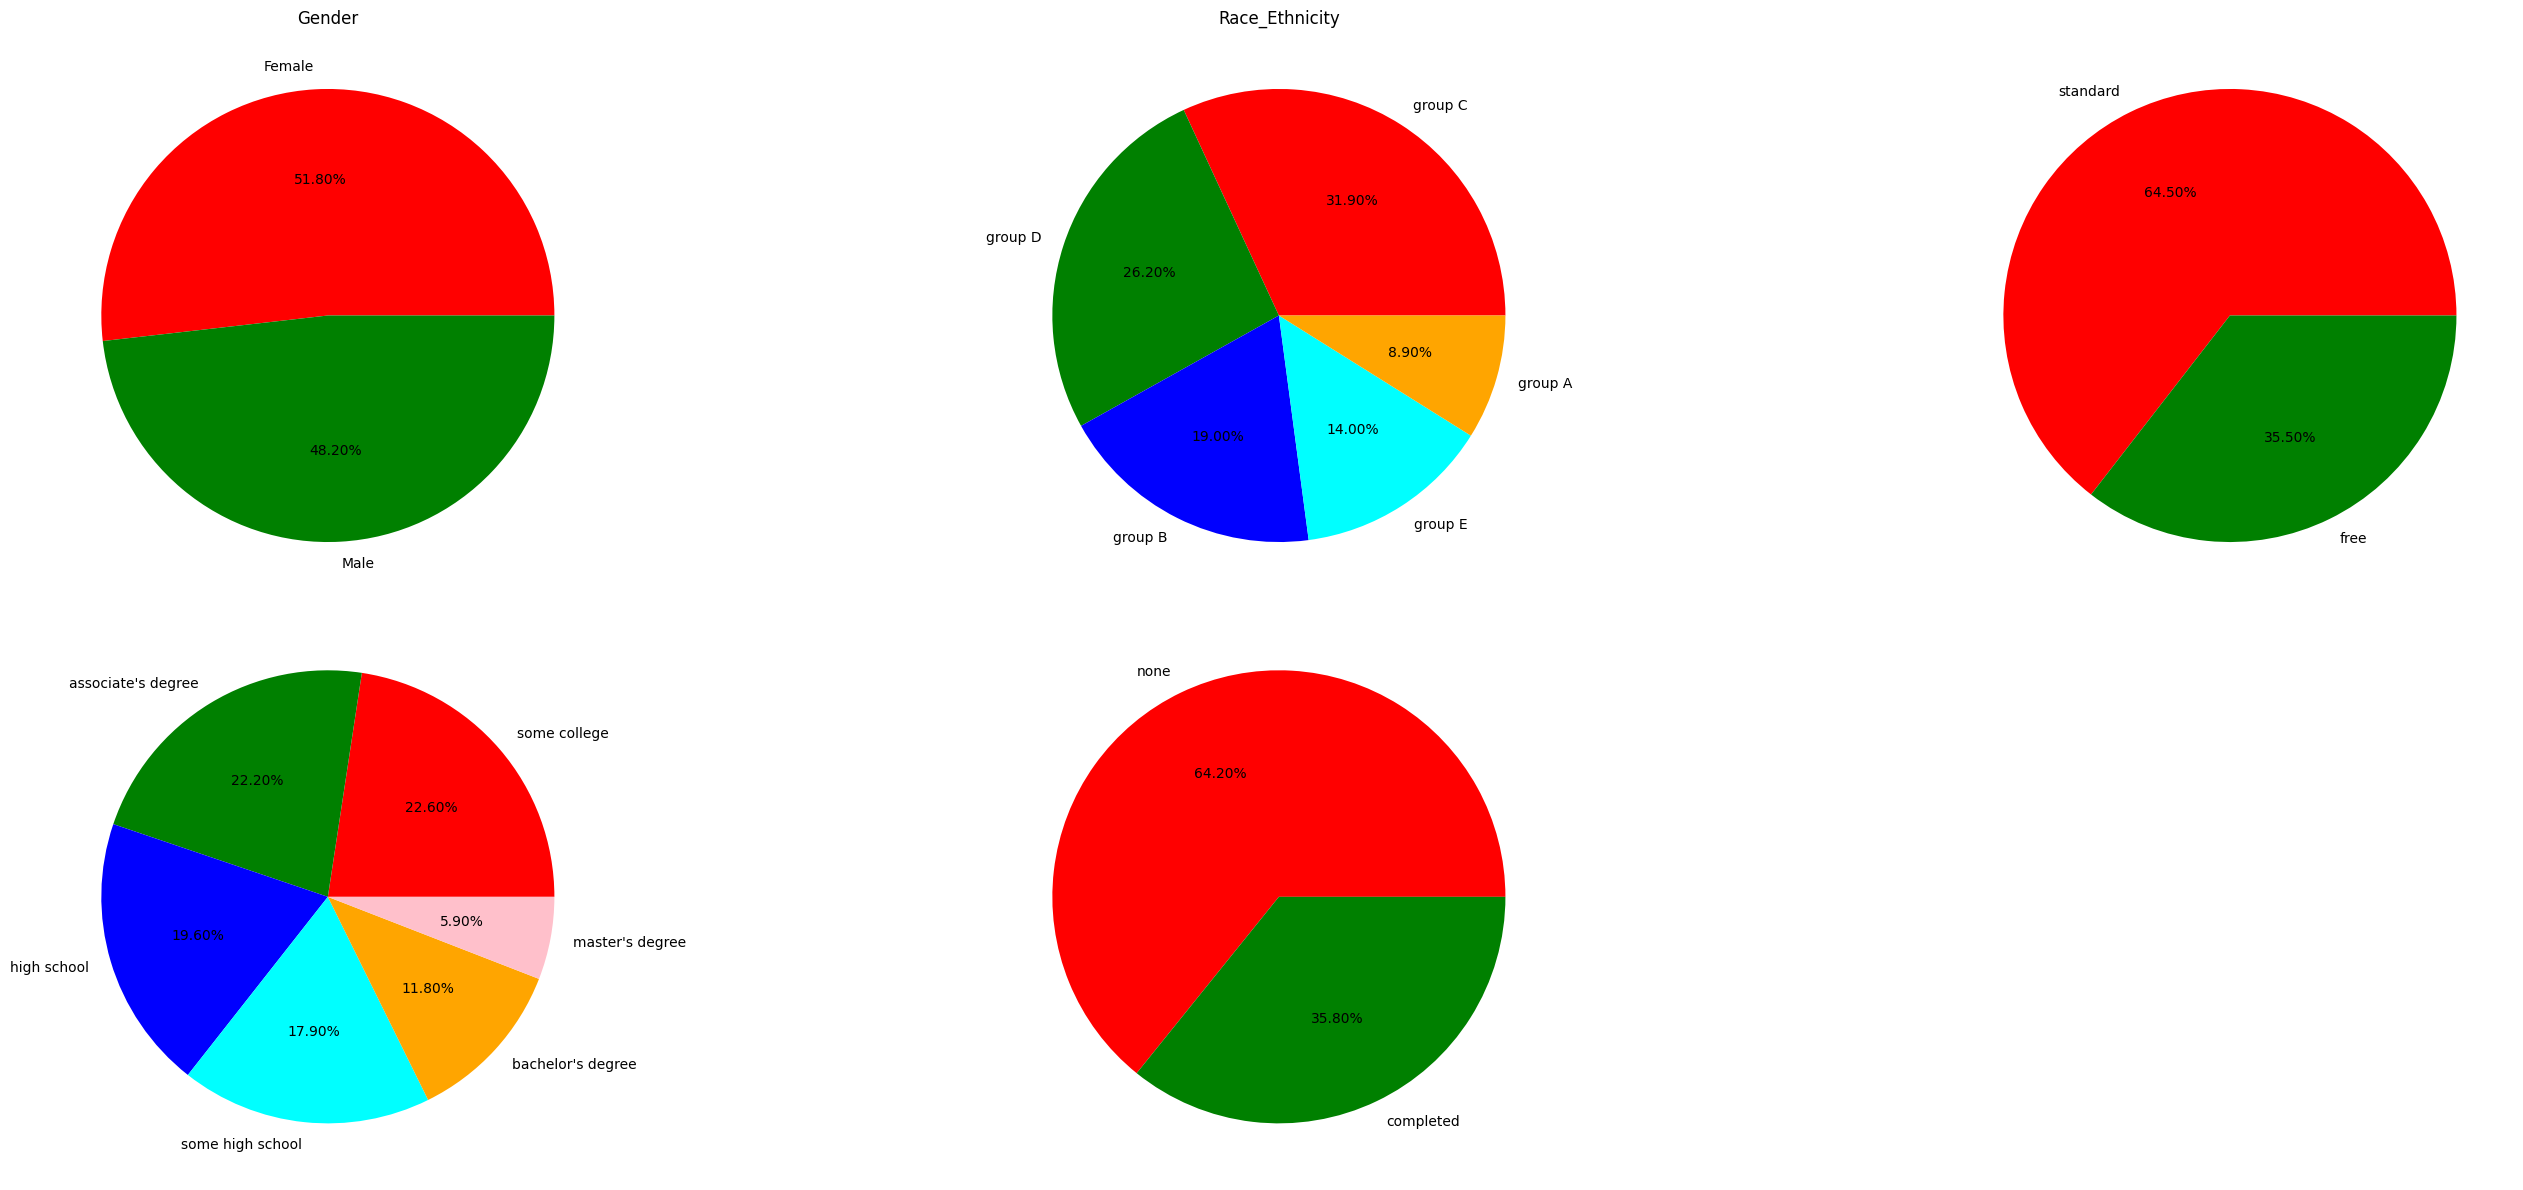

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']
plt.title('Gender')
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = ['group C', 'group D', 'group B', 'group E', 'group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.title('Race_Ethnicity')
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = ['standard', 'free']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.subplot(2, 3, 4)
size = df['parental_level_of_education'].value_counts()
labels = ["some college", "associate's degree", "high school", "some high school", "bachelor's degree", "master's degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'pink']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.subplot(2, 3, 5)
size = df['test_preparation_course'].value_counts()
labels = ['none', 'completed']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')

plt.tight_layout()
plt.show()

##### Insights:
 - Number of Male and Female students are almost equal.
 - There are more number of students in group C than other groups.
 - More number of students getting standard lunch.
 - Number of students are closely equal who have associate's degree and some college degree.
 - There are more number of students who have not enrolled in any test preparation course.

#### Checking Outlier

<Axes: >

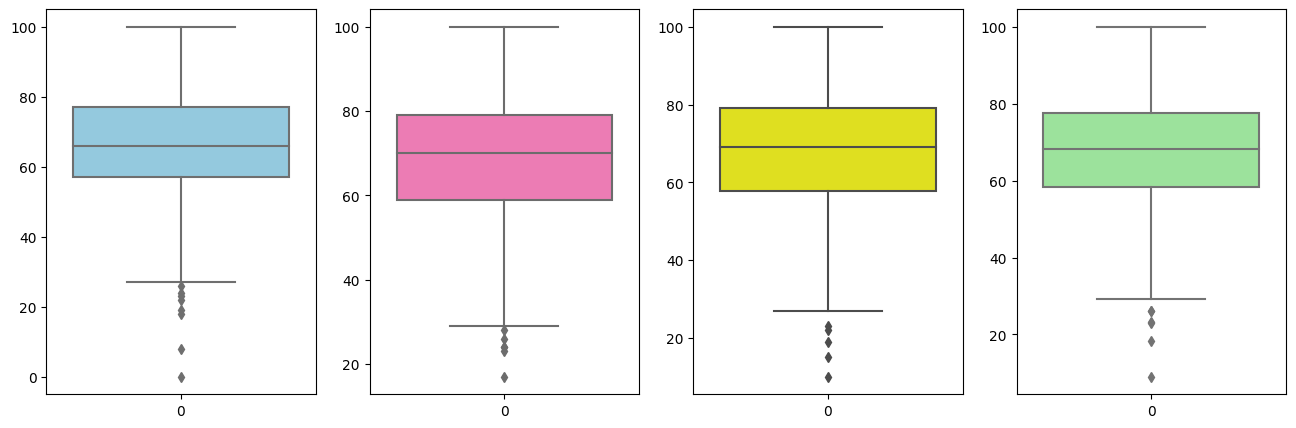

In [30]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

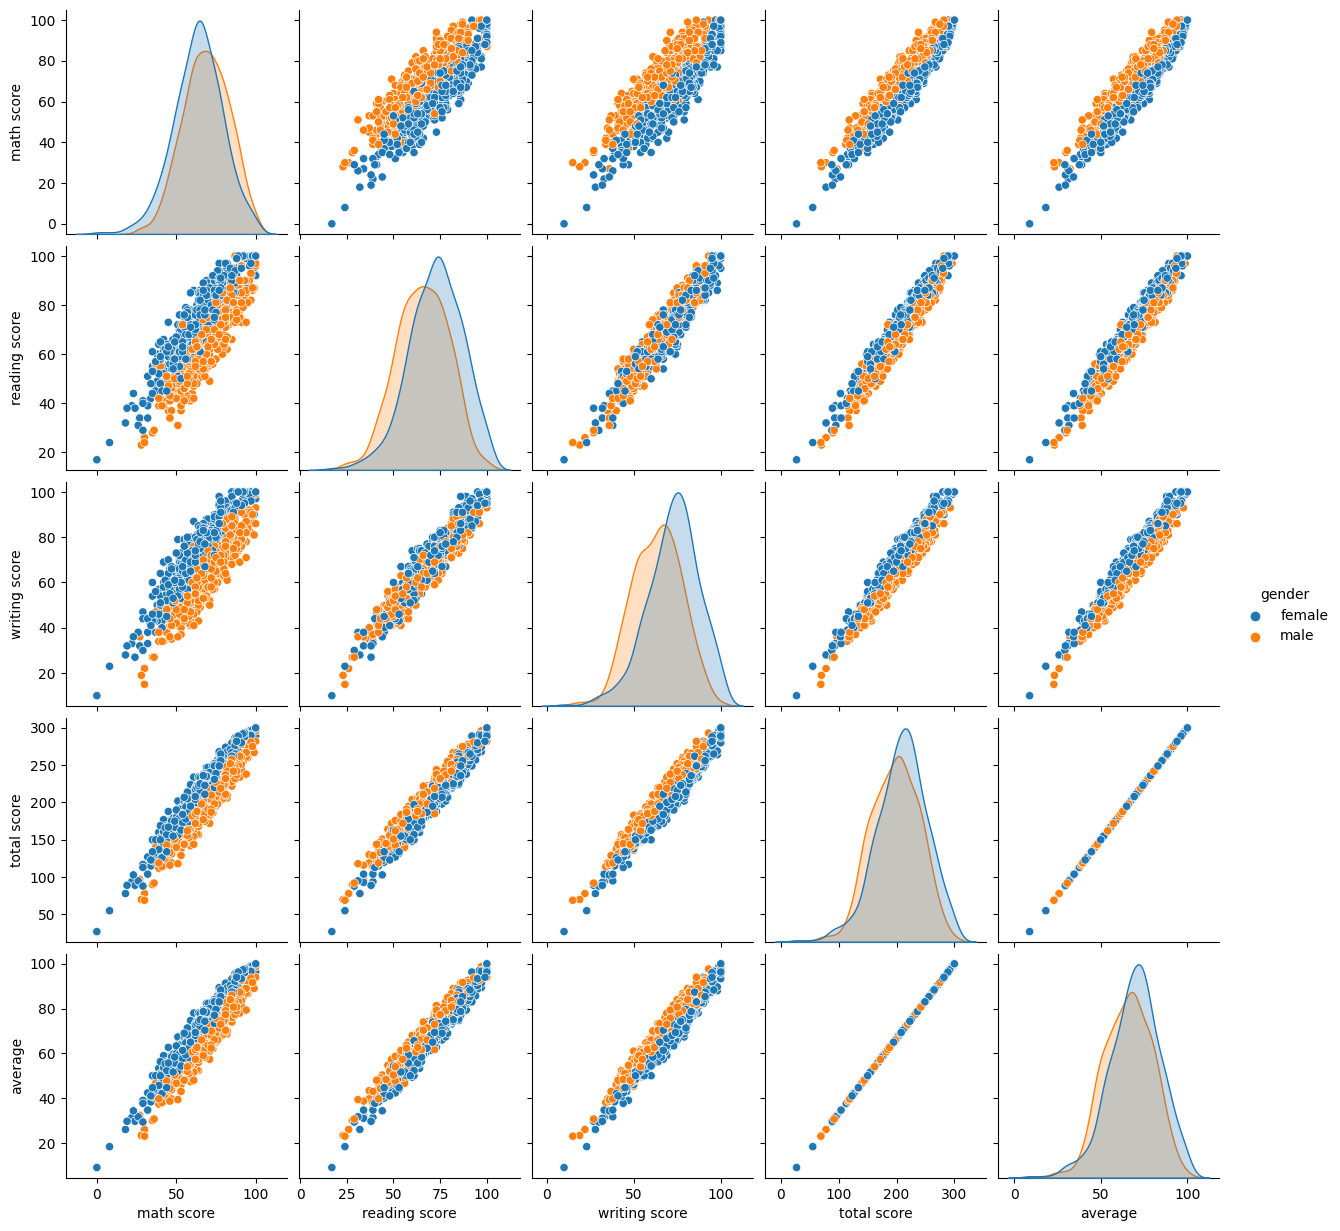

In [52]:
sns.pairplot(df, hue='gender')
plt.show()

### Conclusions:
 - Student's performance are related with lunch, race, parental education.
 - Female students lead in pass percentage and also are top scores.
 - Students performance in not much related with test preperation course.
 - Finishing test preperation course is benefitial.